In [5]:

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [58]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Text(0.5, 0, '$x_1$')

Text(0, 0.5, '$y$')

(0.0, 2.0, 0.0, 15.0)

Saving figure generated_data_plot


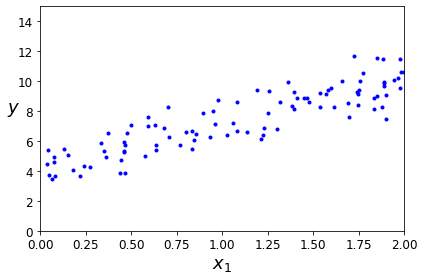

In [59]:

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

In [60]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.18845059],
       [3.00434158]])

array([[ 4.18845059],
       [10.19713374]])

(0.0, 2.0, 0.0, 15.0)

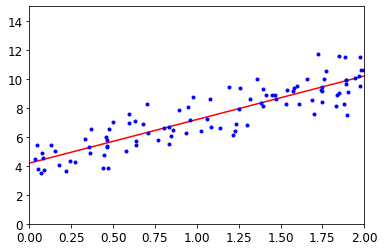

In [61]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

plt.plot(X_new, y_predict, "-r")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [62]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_
lin_reg.predict(X_new)

LinearRegression()

(array([4.18845059]), array([[3.00434158]]))

array([[ 4.18845059],
       [10.19713374]])

In [63]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.18845059],
       [3.00434158]])

In [64]:
np.linalg.pinv(X_b).dot(y)

array([[4.18845059],
       [3.00434158]])

(2, 1)

(100, 2)

array([[1.73252199],
       [0.99384611],
       [1.76368171],
       [1.28646695],
       [1.03957172],
       [1.37722404],
       [1.69053148],
       [1.55735039],
       [1.6277037 ],
       [1.48784388],
       [1.51954251],
       [1.66805384],
       [1.100649  ],
       [1.32755973],
       [1.07371525],
       [1.79910682],
       [1.75783471],
       [0.90167257],
       [1.53212857],
       [1.74003159],
       [1.03525833],
       [1.40187287],
       [1.73079451],
       [0.8964854 ],
       [1.52441061],
       [1.14577524],
       [1.73922512],
       [1.78338701],
       [1.75803076],
       [1.31316398],
       [1.68021249],
       [1.66365653],
       [1.16636126],
       [1.64886028],
       [0.89938301],
       [1.42867988],
       [1.08204317],
       [0.97846514],
       [0.93718828],
       [1.52333974],
       [1.18602265],
       [1.55029188],
       [0.92621279],
       [1.16275527],
       [1.3749435 ],
       [1.61271432],
       [1.16603193],
       [1.456

array([[4.15346121],
       [3.03145279]])

(0.0, 2.0, 0.0, 15.0)

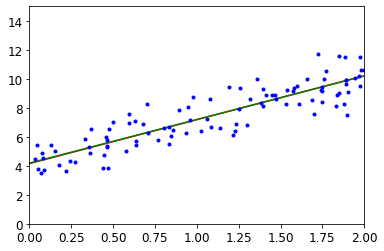

In [68]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.rand(2,1)

X_b = np.c_[np.ones((100, 1)), X]

theta.shape
X_b.shape
for iteration in range(n_iterations):
    gradiants = 2/n_iterations * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta * gradiants
theta

y_predict_gradient = X_new_b.dot(theta)

plt.plot(X_new, y_predict_gradient, "-r")
plt.plot(X_new, y_predict, "-g")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [14]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

<Figure size 720x288 with 0 Axes>

Text(0, 0.5, '$y$')

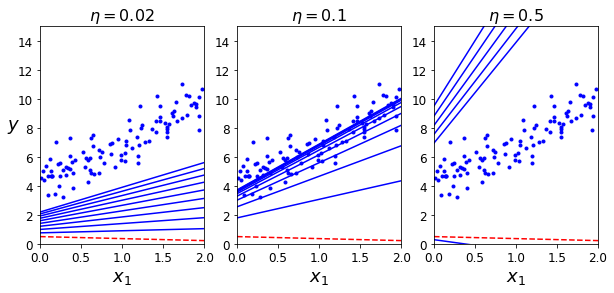

In [15]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

In [16]:
theta_path_sgd = []
m = len(X_b)

In [17]:
n_epochs = 50

np.random.seed(42)
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index: random_index + 1]
        yi = y[random_index: random_index + 1]
        gradiants = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(m * epoch + i)
        theta = theta - eta * gradiants

theta

array([[4.21076011],
       [2.74856079]])

In [18]:
n_epochs = 50
mini_batches = 20

np.random.seed(42)
t0, t1 = 200, 1000 # learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

t = 0
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    x_b_shuffeled = X_b[shuffled_indices]
    y_shuffeled = y[shuffled_indices]
    for i in range(0, m, mini_batches):
        t += 1
        xi = x_b_shuffeled[i: i + mini_batches]
        yi = y_shuffeled[i : i + mini_batches]
        gradiants = 2/mini_batches * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradiants

theta

array([[4.25214635],
       [2.7896408 ]])

In [19]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

SGDRegressor(eta0=0.1, penalty=None)

(array([4.21822901]), array([2.7972115]))

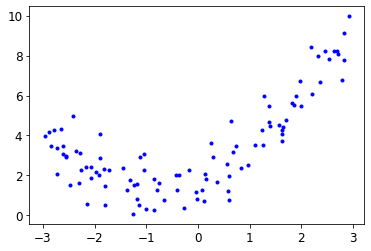

In [20]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, 'b.')

In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

X[0]
X_poly[0]

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

array([-0.75275929])

array([-0.75275929,  0.56664654])

LinearRegression()

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

Text(0.5, 0, '$x_1$')

Text(0, 0.5, '$y$')

(-3.0, 3.0, 0.0, 10.0)

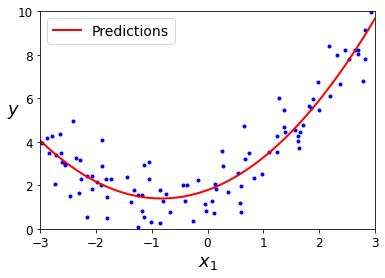

In [22]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)

y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
#save_fig("quadratic_predictions_plot")
plt.show()

In [23]:

np.random.seed(42)
X_poly_b = np.c_[np.ones((m, 1)), X, X * X]


n_epochs = 50
batch_size = 20

t0 , t1 = 150, 7500
def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(3, 1)
t = 0
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    x_b_shuffeled = X_poly_b[shuffled_indices]
    y_shuffeled = y[shuffled_indices]
    for i in range(0, m , batch_size):
        t += 1
        xi = x_b_shuffeled[i : i + batch_size]
        yi = y_shuffeled[i : i + batch_size]
        gradiants = 2 / batch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradiants

theta

array([[1.76114915],
       [0.91573098],
       [0.57414487]])

Text(0.5, 0, '$x_1$')

Text(0, 0.5, '$y$')

(-3.0, 3.0, 0.0, 10.0)

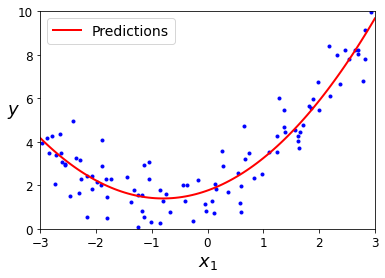

In [24]:
def predict(X):
    lx = len(X)
    nx = np.c_[np.ones((lx, 1)), X, X * X]
    return nx.dot(theta)

X_new = np.linspace(-3, 3, 100).reshape(100, 1)
y_new = predict(X_new)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
#save_fig("quadratic_predictions_plot")
plt.show()

In [25]:
theta = np.random.randn(3, 1)
n_epochs = 100
for epoch in range(n_epochs):
    gradiants = 2 / m * X_poly_b.T.dot(X_poly_b.dot(theta) - y)
    theta = theta - 0.05 * gradiants
theta

array([[1.77804966],
       [0.93369753],
       [0.56518645]])

In [26]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

#X[0]
#X_poly[0]

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

LinearRegression()

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

Text(0.5, 0, '$x_1$')

Text(0, 0.5, '$y$')

(-3.0, 3.0, 0.0, 10.0)

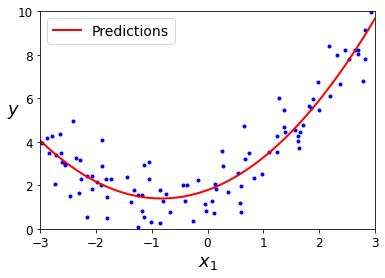

In [27]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)

y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
#save_fig("quadratic_predictions_plot")
plt.show()

(0.0, 80.0, 0.0, 3.0)

Saving figure underfitting_learning_curves_plot


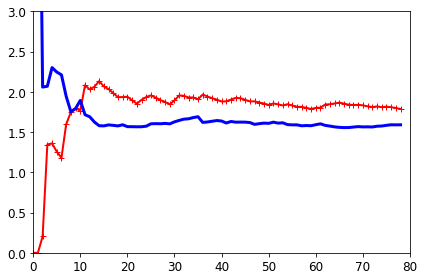

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

np.random.seed(42)

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
save_fig("underfitting_learning_curves_plot")   # not shown
plt.show()   

(0.0, 80.0, 0.0, 3.0)

Saving figure underfitting_learning_curves_plot


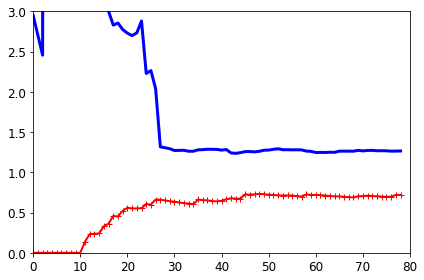

In [29]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
save_fig("underfitting_learning_curves_plot")   # not shown
plt.show()  

using alpha

array([[nan]])

In [30]:
np.random.seed(42)
X_poly_b = np.c_[np.ones((m, 1)), X, X * X]


n_epochs = 50
batch_size = 20

t0 , t1 = 150, 7500
def learning_schedule(t):
    return t0 / (t + t1)

a = 10
theta = np.random.randn(3, 1)

t = 0
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    x_b_shuffeled = X_poly_b[shuffled_indices]
    y_shuffeled = y[shuffled_indices]
    for i in range(0, m , batch_size):
        t += 1
        xi = x_b_shuffeled[i : i + batch_size]
        yi = y_shuffeled[i : i + batch_size]
        k = np.copy(theta)
        k[0, 0] = 0
        gradiants = 2 / batch_size * xi.T.dot(xi.dot(theta) - yi) + a * 2 * k
        eta = learning_schedule(t)
        theta = theta - eta * gradiants
theta

array([[2.77817893],
       [0.19911246],
       [0.29257113]])

In [31]:
theta = np.random.randn(3, 1)
n_epochs = 100
for epoch in range(n_epochs):
    gradiants = 2 / m * X_poly_b.T.dot(X_poly_b.dot(theta) - y)
    theta = theta - 0.05 * gradiants
theta

array([[1.77804966],
       [0.93369753],
       [0.56518645]])

In [32]:
n_iterations = 100

X_poly_b = np.c_[np.ones((m, 1)), X, X * X]

a = 0
eta = 0.005

theta = np.random.randn(3 , 1)
for iteration in range(n_iterations):
    gradiants = 2/m * X_poly_b.T.dot(X_poly_b.dot(theta)-y)
    theta = (1-2*eta*a)*theta - eta * gradiants
theta

theta_best = (np.linalg.inv(X_poly_b.T.dot(X_poly_b) + a * np.identity(3))).dot(X_poly_b.T.dot(y))
#theta_best = np.linalg.inv(X_poly_b.T.dot(X_poly_b)).dot(X_poly_b.T).dot(y)
theta_best



array([[0.32082479],
       [0.89274127],
       [0.83696188]])

array([[1.78134581],
       [0.93366893],
       [0.56456263]])

In [33]:
n_iterations = 50
eta = 0.05
a = 0

np.random.seed(42)
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(3 , 1)
for iteration in range(n_iterations):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_poly_b[random_index: random_index + 1]
        yi = y[random_index: random_index + 1]
        gradiants = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(iteration * m + i);
        theta = (1-2*eta*a)*theta - eta * gradiants
theta

array([[-1.02650056e+08],
       [ 1.70149076e+06],
       [ 2.17299263e+07]])

In [34]:
n_epochs = 50

np.random.seed(42)
t0, t1 = 5, 100 # learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)

a=0.1
theta = np.random.randn(3,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_poly_b[random_index: random_index + 1]
        yi = y[random_index: random_index + 1]
        gradiants = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(m * epoch + i)
        theta = (1 - a*eta*2)*theta - eta * gradiants

theta

array([[1.47250513],
       [0.88798195],
       [0.58351912]])

In [35]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [36]:
np.random.seed(42)
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

Ridge(alpha=1, solver='cholesky')

array([[1.55071465]])

SGDRegressor()

array([1.46486366])

In [37]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

Lasso(alpha=0.1)

array([1.53788174])

In [38]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

ElasticNet(alpha=0.1)

array([1.54333232])

In [39]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [40]:
%%capture

from copy import deepcopy
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train);  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled);
    val_error = mean_squared_error(y_val, y_val_predict);
    if val_error < minimum_val_error:
        minimum_val_error = val_error;
        best_epoch = epoch;
        best_model = deepcopy(sgd_reg);

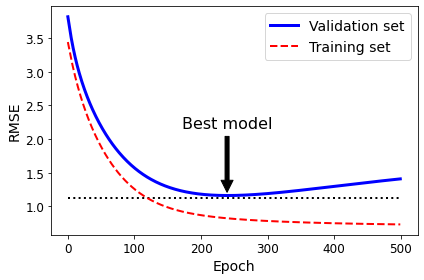

In [41]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
from IPython.utils import io

with io.capture_output() as captured:
    for epoch in range(n_epochs):
        sgd_reg.fit(X_train_poly_scaled, y_train);
        y_train_predict = sgd_reg.predict(X_train_poly_scaled);
        y_val_predict = sgd_reg.predict(X_val_poly_scaled);
        train_errors.append(mean_squared_error(y_train, y_train_predict));
        val_errors.append(mean_squared_error(y_val, y_val_predict));

    best_epoch = np.argmin(val_errors)
    best_val_rmse = np.sqrt(val_errors[best_epoch])

    plt.annotate('Best model',
                xy=(best_epoch, best_val_rmse),
                xytext=(best_epoch, best_val_rmse + 1),
                ha="center",
                arrowprops=dict(facecolor='black', shrink=0.05),
                fontsize=16,
                )

    best_val_rmse -= 0.03  # just to make the graph look better
    plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
    plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Epoch", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)
    save_fig("early_stopping_plot")
plt.show()

In [42]:
best_epoch, best_model

(239,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=-inf, warm_start=True))

In [45]:
np.exp(2)

7.38905609893065

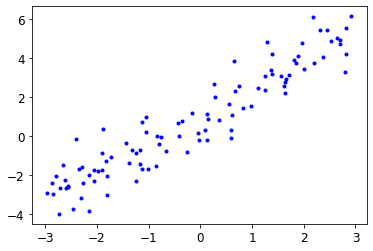

In [308]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 1 + 1.5 * X + np.random.randn(m, 1)

y_p = (y > 1)
plt.plot(X, y, 'b.')

In [309]:
def sigmoid(X):
    return 1 / (1 + np.exp(-X))

X_b = np.c_[np.ones((m, 1)), X]

n_epochs = 200;

theta = np.random.randn(2, 1)

t0, t1 = 200, 1000
def etaC(t):
    t0 / (t + t1)

theta
for epoch in range(n_epochs):
    gradiants =  1 / m * X_b.T.dot(sigmoid(X_b.dot(theta)) - y_p)
    theta = theta - 0.05 * gradiants
theta

w = 20

#sigmoid(X_b[:w].dot(theta))
#y_p[:w]
np.c_[sigmoid(X_b[:w].dot(theta)), y_p[:w]]

array([[0.01300189],
       [1.45353408]])

array([[-0.29685763],
       [ 2.05585405]])

array([[0.13652928, 0.        ],
       [0.99484572, 1.        ],
       [0.92856261, 1.        ],
       [0.71506392, 0.        ],
       [0.01056162, 0.        ],
       [0.01055852, 0.        ],
       [0.00317917, 0.        ],
       [0.98551386, 1.        ],
       [0.72119735, 1.        ],
       [0.90634001, 1.        ],
       [0.00200419, 0.        ],
       [0.99592799, 1.        ],
       [0.97820127, 1.        ],
       [0.0209347 , 0.        ],
       [0.0144631 , 0.        ],
       [0.01474346, 0.        ],
       [0.06229502, 0.        ],
       [0.502129  , 0.        ],
       [0.24299587, 0.        ],
       [0.05355153, 0.        ]])

In [182]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [310]:
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int)

In [311]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)
log_reg.intercept_
log_reg.coef_

LogisticRegression()

array([-7.1947083])

array([[4.3330846]])

In [313]:
def sigmoid(X):
    return 1 / (1 + np.exp(-X))

X_b = np.c_[np.ones((len(X), 1)), X, X*X, X*X*X]

n_epochs = 105;

theta = np.random.randn(4, 1)

t0, t1 = 200, 1000
def etaC(t):
    t0 / (t + t1)

yi = np.reshape(y, (len(X), 1))

theta
for epoch in range(n_epochs):
    gradiants =  1 / m * X_b.T.dot(sigmoid(X_b.dot(theta)) - yi)
    theta = theta - 0.05 * gradiants
theta

w = 5
per = np.random.permutation(len(X))

y_prob = log_reg.predict_proba(X[per][:w])
sigmoid(X_b[:5].dot(theta));

prediction = ( sigmoid(X_b[per][:w].dot(theta)) > 0.5 )
np.c_[prediction, yi[per][:w]]

array([[1.81361119e-03],
       [7.55935282e-01],
       [1.93354263e+00],
       [4.13874837e-01]])

array([[-1.72868008],
       [-0.51449419],
       [ 0.90896404],
       [ 0.09016815]])

array([[0.14252202],
       [0.14252202],
       [0.14252202],
       [0.14252202],
       [0.14252202]])

array([[1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1]])

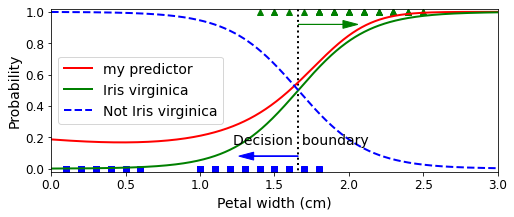

In [296]:

X_new = np.linspace(0, 3, 1000).reshape(-1, 1);
y_proba = log_reg.predict_proba(X_new);
y_proba_my = sigmoid(np.c_[np.ones((len(X_new), 1)), X_new, X_new * X_new, X_new * X_new * X_new].dot(theta));
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0];

with io.capture_output() as captured:
    plt.figure(figsize=(8, 3));
    plt.plot(X[y==0], y[y==0], "bs");
    plt.plot(X[y==1], y[y==1], "g^");
    plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2);
    plt.plot(X_new, y_proba_my, "r-", linewidth=2, label="my predictor");
    plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica");
    plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica");
    plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center");
    plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b');
    plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g');
    plt.xlabel("Petal width (cm)", fontsize=14);
    plt.ylabel("Probability", fontsize=14);
    plt.legend(loc="center left", fontsize=14);
    plt.axis([0, 3, -0.02, 1.02]);
plt.show()

In [298]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [314]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [315]:
softmax_reg.predict([[5, 2]])
softmax_reg.predict_proba([[5, 2]])

array([2])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

In [358]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

np.random.seed(2042)

X_with_bias = np.c_[np.ones((len(X), 1)), X]

In [359]:
test_ratio = 0.2
validation_ratio = 0.2

total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

index_permutation = np.random.permutation(total_size)
X_train = X_with_bias[index_permutation[:train_size]]
y_train = y[index_permutation[:train_size]]
X_test = X_with_bias[index_permutation[train_size : -test_size]]
y_test = y[index_permutation[train_size : -test_size]]
X_validate = X_with_bias[index_permutation[-test_size:]]
y_validate = y[index_permutation[-test_size:]]

In [360]:
def yToOutput(y):
    n_classes = y.max() + 1
    m = len(y)
    ny = np.zeros((m, n_classes))
    ny[np.arange(m), y] = 1
    return ny

In [361]:
y_train[:10]
yToOutput(y_train[:10])

array([0, 1, 2, 1, 1, 0, 1, 1, 1, 0])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [362]:
y_train_a = yToOutput(y_train)
y_test_a = yToOutput(y_test)
y_validate_a = yToOutput(y_validate)

In [363]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

In [364]:
n_inputs = X_train.shape[1]
n_outputs = len(np.unique(y_train)) 

In [482]:
eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

theta = np.random.randn(n_inputs, n_outputs)

theta
for i in range(n_iterations):
    logits = X_train.dot(theta)
    y_proba = softmax(logits)
    loss = -np.mean(np.sum(y_train_a * np.log(y_proba + epsilon), axis=1))

    logits_test = X_test.dot(theta)
    y_test_proba = softmax(logits_test)
    valid_loss = -np.mean(np.sum(y_test_a * np.log(y_test_proba + epsilon), axis=1))
    if(i % 500 == 0):
        print(i, loss, valid_loss)
    gradient = 1 / m * X_train.T.dot(y_proba - y_train_a)
    theta = theta - eta * gradient
theta

array([[ 0.31089382,  1.38079754,  0.69448665],
       [-0.54600714, -1.16927173,  0.46252114],
       [ 0.97802956,  0.05519935,  0.14631287]])

0 2.794873610022504 2.8405263204605404
[[-0.28234265 -0.2756559   0.55799855]
 [-0.37046794 -1.33219617  1.70266411]
 [-0.05462715 -0.42886646  0.4834936 ]]
500 0.8897053969583303 0.8795975921649956
[[-0.16000971  0.06918662  0.0908231 ]
 [ 0.01844789 -0.01609999 -0.00234789]
 [ 0.06352981 -0.00688652 -0.05664329]]
1000 0.712609751813406 0.7177579858222637
[[-1.18251177e-01  4.67721745e-02  7.14790029e-02]
 [ 1.72125253e-02 -1.46613618e-02 -2.55116347e-03]
 [ 4.70831111e-02  5.44338064e-06 -4.70885545e-02]]
1500 0.6108562494364438 0.6227207955677903
[[-0.08945877  0.03077188  0.0586869 ]
 [ 0.01480066 -0.01261882 -0.00218185]
 [ 0.03553021  0.00467079 -0.040201  ]]
2000 0.5472699126159435 0.5616257802222367
[[-0.07080368  0.02038647  0.0504172 ]
 [ 0.01254169 -0.0107713  -0.0017704 ]
 [ 0.02796973  0.00726311 -0.03523284]]
2500 0.5036395688839407 0.5184539025347729
[[-0.05840021  0.013581    0.04481921]
 [ 0.01071967 -0.00925062 -0.00146904]
 [ 0.02292385  0.00854968 -0.03147353]]
3000

array([[ 4.18146209,  0.32692718, -2.12221126],
       [-1.23697028,  0.00910821, -0.02489567],
       [-0.59361392,  0.03761021,  1.73554548]])

In [422]:
logits = X_validate.dot(theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_validate)
accuracy_score

0.9333333333333333

In [479]:
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter

theta = np.random.randn(n_inputs, n_outputs)

# theta

# np.r_[np.zeros([1, n_outputs]), alpha * theta[1:]]

for i in range(n_iterations):
    logits = X_train.dot(theta)
    y_proba = softmax(logits)
    loss = -np.mean(np.sum(y_train_a * np.log(y_proba + epsilon), axis=1))

    logits_test = X_test.dot(theta)
    y_test_proba = softmax(logits_test)
    valid_loss = -np.mean(np.sum(y_test_a * np.log(y_test_proba + epsilon), axis=1))
    if(i % 500 == 0):
        print(i, loss, valid_loss)
    gradient = 1 / m * X_train.T.dot(y_proba - y_train_a) + np.r_[np.zeros([1, n_outputs]), alpha * theta[1:]]
    theta = theta - eta * gradient
#theta

0 1.983958996763006 2.0643741155486066
500 0.4645832684890955 0.4985593936093741
1000 0.41033575121765636 0.44855608550043286
1500 0.3867132314230945 0.42707972850651144
2000 0.37377638276872777 0.41551675059606413
2500 0.36600816141832326 0.4086651665570912
3000 0.3611223742891202 0.4043954381624957
3500 0.35796709123780046 0.401655013383649
4000 0.3558959692632113 0.3998636023351654
4500 0.35452225907524926 0.3986786791598181
5000 0.3536048880305752 0.3978888369074938


In [478]:
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter

Theta = np.random.randn(n_inputs, n_outputs)

Theta

Theta[: , 1:]
np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]

np.c_[np.zeros([n_inputs, 1]), alpha * Theta[:,1:]]
for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(y_train_a * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - y_train_a
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    if iteration % 500 == 0:
        print(iteration, loss)
    Theta = Theta - eta * gradients

array([[-0.49976325,  0.32531602, -0.62903027],
       [-0.24373097,  0.57759195, -2.41052834],
       [ 1.23235688,  0.367771  ,  0.21052988]])

array([[ 0.32531602, -0.62903027],
       [ 0.57759195, -2.41052834],
       [ 0.367771  ,  0.21052988]])

array([[ 0.        ,  0.        ,  0.        ],
       [-0.0243731 ,  0.0577592 , -0.24105283],
       [ 0.12323569,  0.0367771 ,  0.02105299]])

array([[ 0.        ,  0.0325316 , -0.06290303],
       [ 0.        ,  0.0577592 , -0.24105283],
       [ 0.        ,  0.0367771 ,  0.02105299]])

0 6.3554075905323915
500 0.5322902372712637
1000 0.5032386514410944
1500 0.49454504523928944
2000 0.49123892392730006
2500 0.48987470589159593
3000 0.48928835386055125
3500 0.489030371540364
4000 0.48891522883750405
4500 0.48886336938533304
5000 0.48883987411578067


In [452]:
logits = X_validate.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_validate)
accuracy_score

0.9333333333333333